# Базовый уровень

### Подготовка библиотек и датасета 

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df = pd.read_csv(filepath_or_buffer = 'marketing_campaign.csv', delimiter='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


__________________________________________________________________________________________________________________________

### Графики и ответы на вопросы

##### Barlot для определения зависимости между доходом и семейным положением

<AxesSubplot: xlabel='Marital_Status', ylabel='Income'>

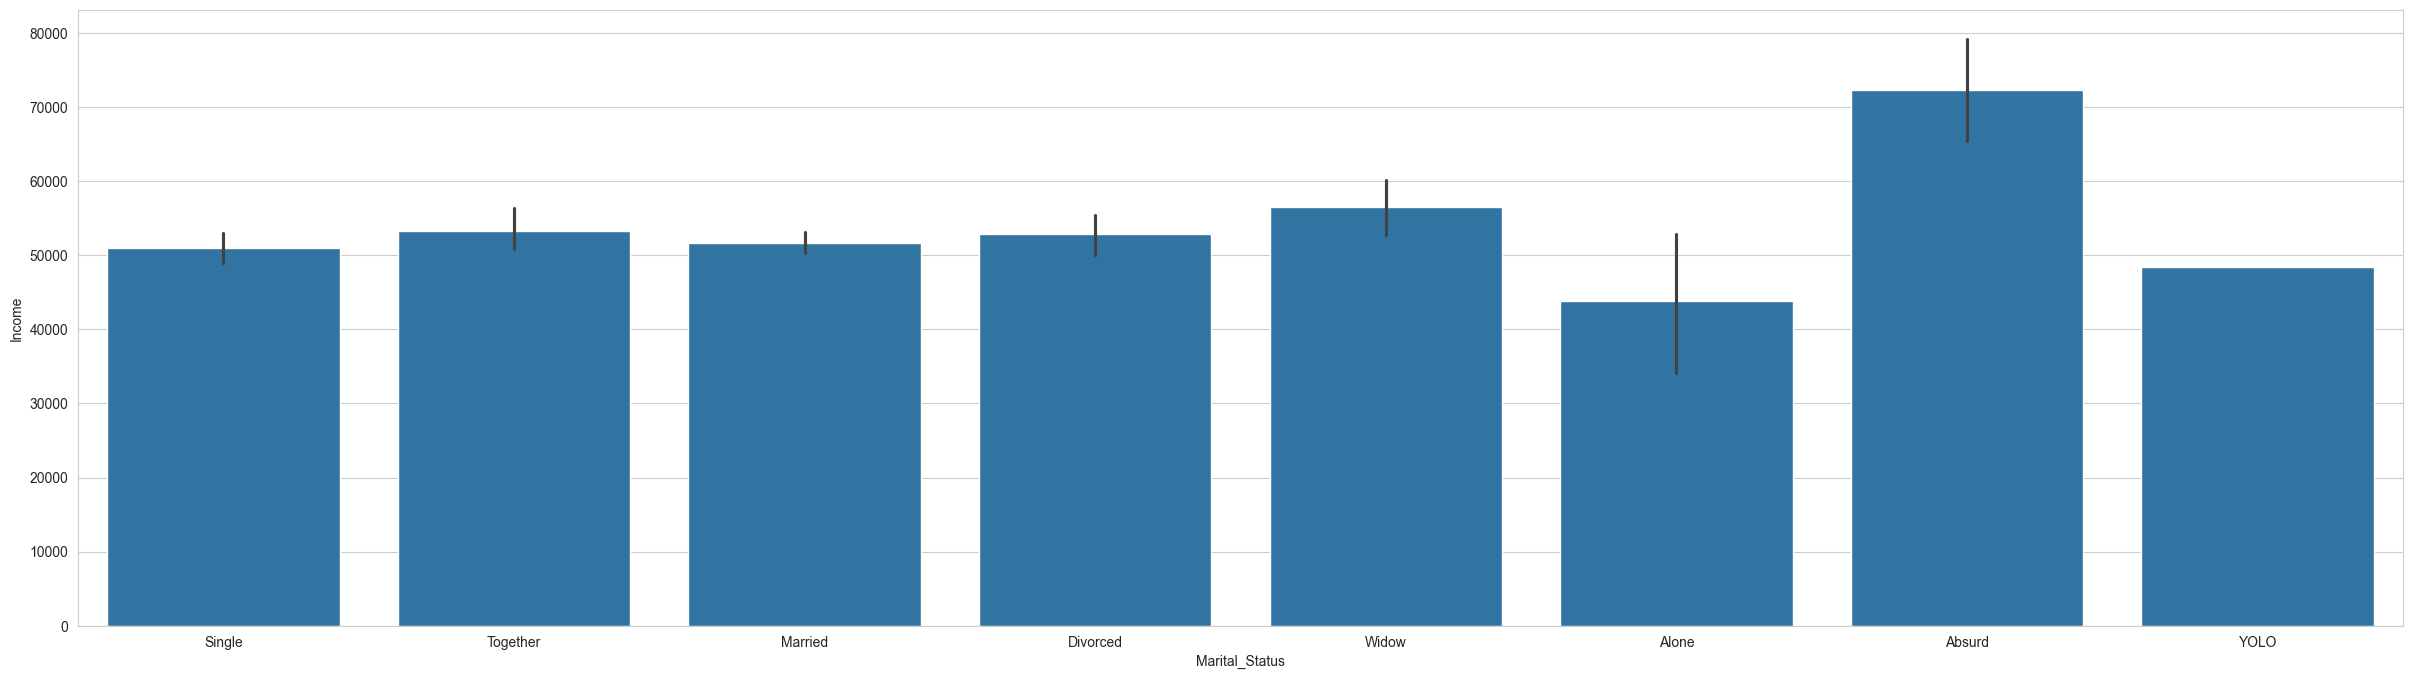

In [101]:
# График 1

plt.figure(figsize=(30,8))
sns.barplot(data=df, x="Marital_Status", y="Income")

##### Barlot для определения зависимости между доходом и возрастом

<AxesSubplot: xlabel='Year_Birth', ylabel='Income'>

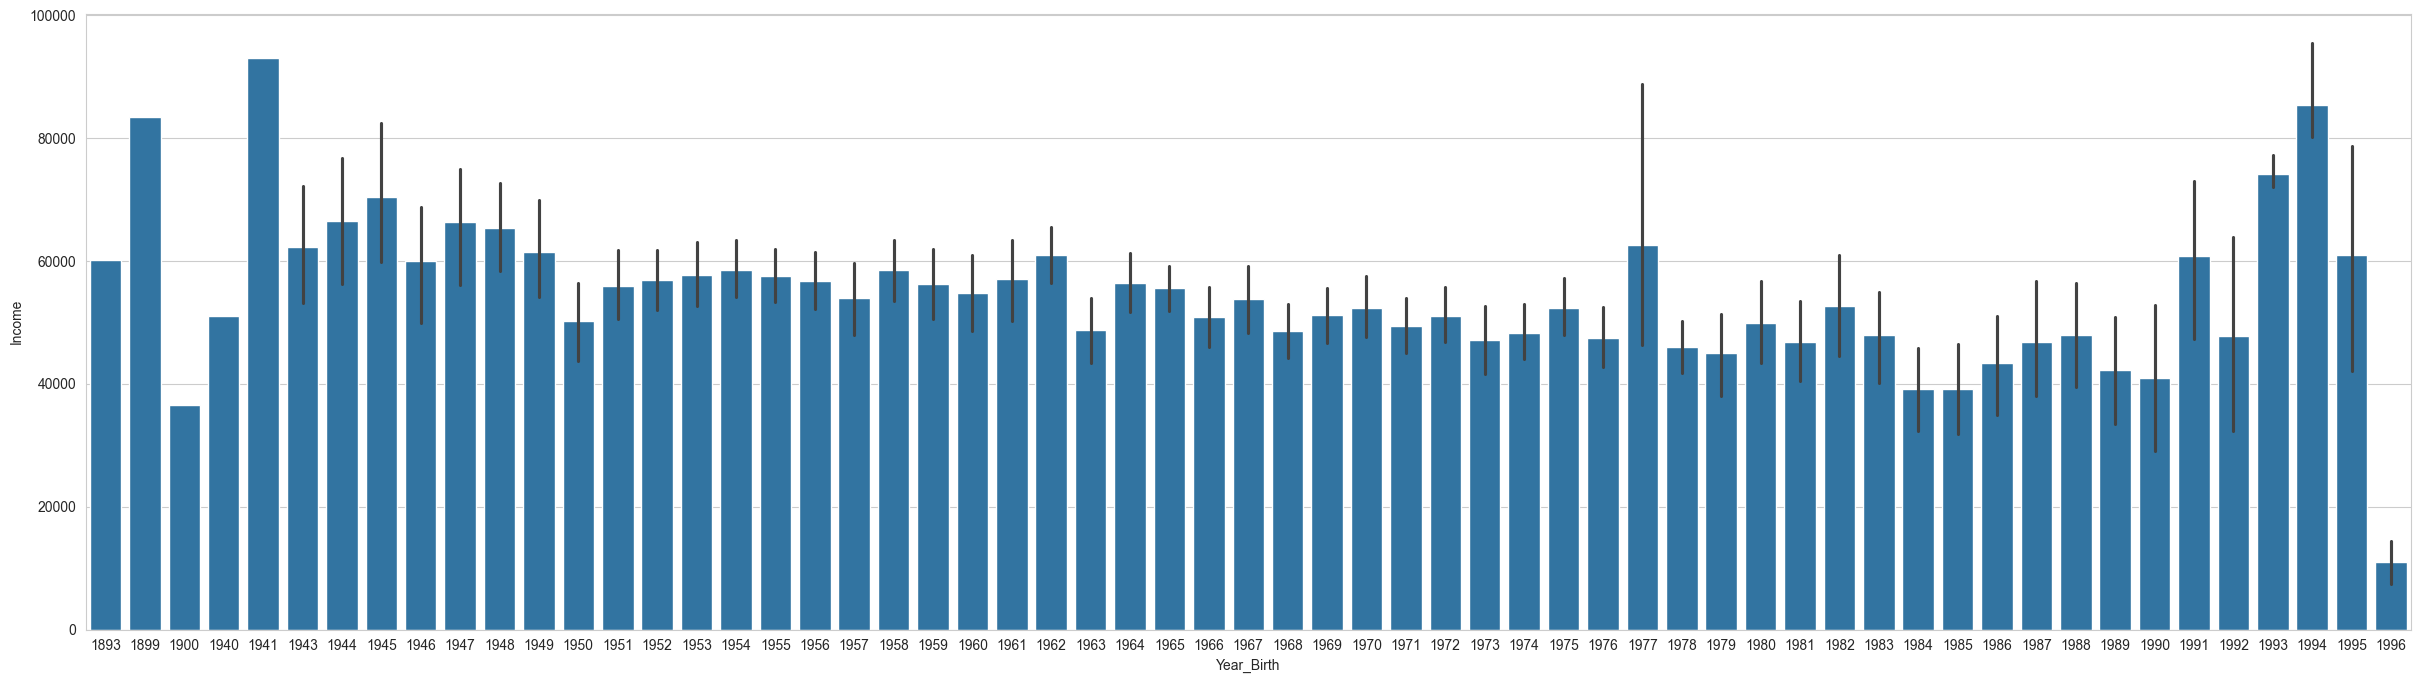

In [102]:
# График 2

plt.figure(figsize=(30,8))
sns.barplot(data=df, x="Year_Birth", y="Income")


##### Barlot для определения зависимости между доходом и количеством детей

<AxesSubplot: xlabel='Kids', ylabel='Income'>

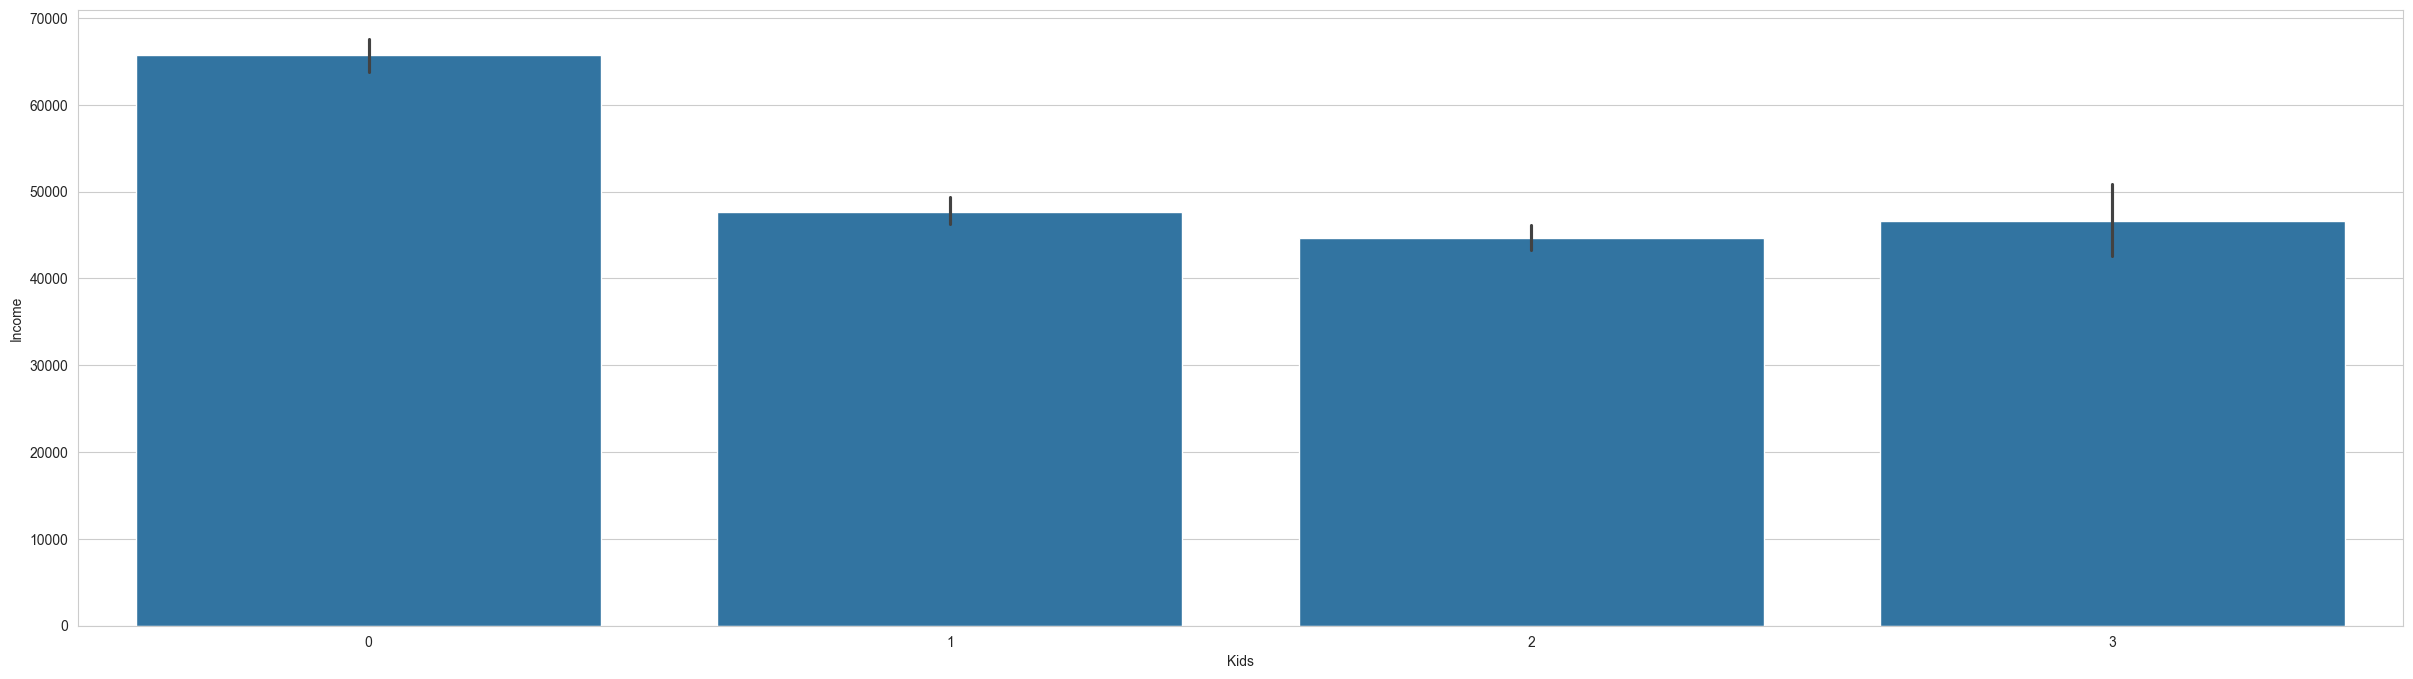

In [103]:
# График 3

df['Kids'] = df['Kidhome'] + df['Teenhome']
plt.figure(figsize=(30,8))
sns.barplot(data=df, x="Kids", y="Income")

### Вопрос 1
Смотря на графики 1, 2 и 3, можно сказать, что:
1) Больше всего доходы у людей с семейным положением Absurd
2) Чем больше возраст, тем выше доходы
3) У тех, у кого нет детей, доходы выше

_______________________________________________________________________________________________________________________________________________

##### Countplot для определения зависимости между семейным положенением и количеством детей 

<AxesSubplot: xlabel='Kids', ylabel='count'>

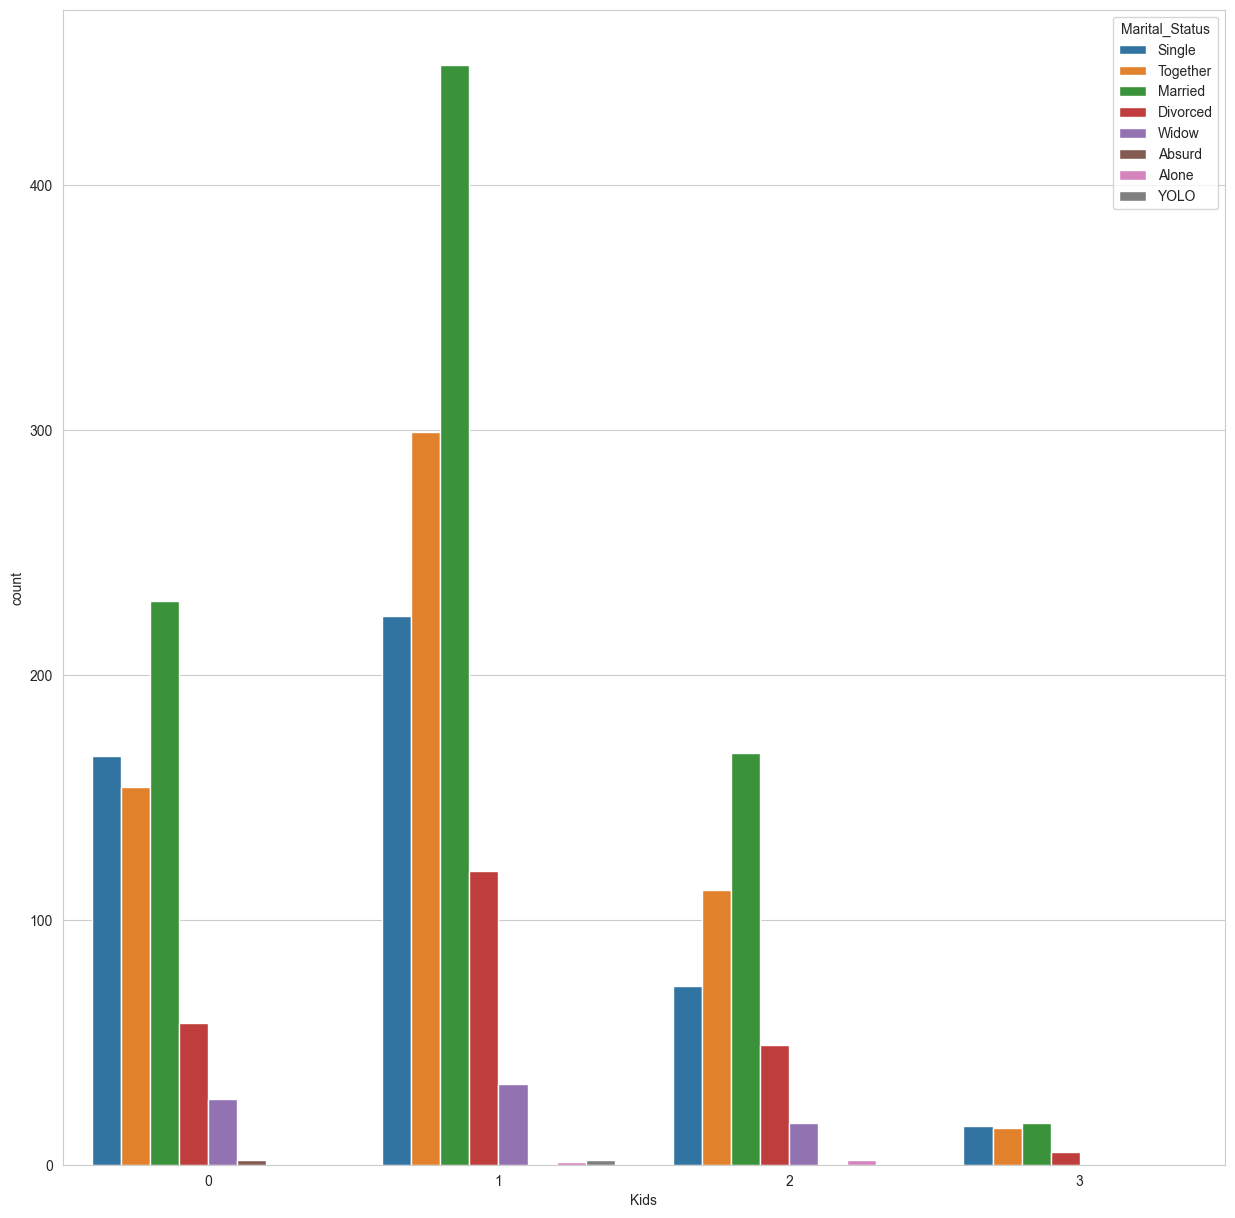

In [104]:
# График 4


sns.countplot(x='Kids', hue='Marital_Status', data=df)

### Вопрос 2
Смотря на график 4, можно сказать, что люди с семейным положением Married, Together, Single в основном имеют больше детей

_______________________________________________________________________________________________________________________________________________

##### Lineplot график для показа, как зависят траты на золото от дохода 

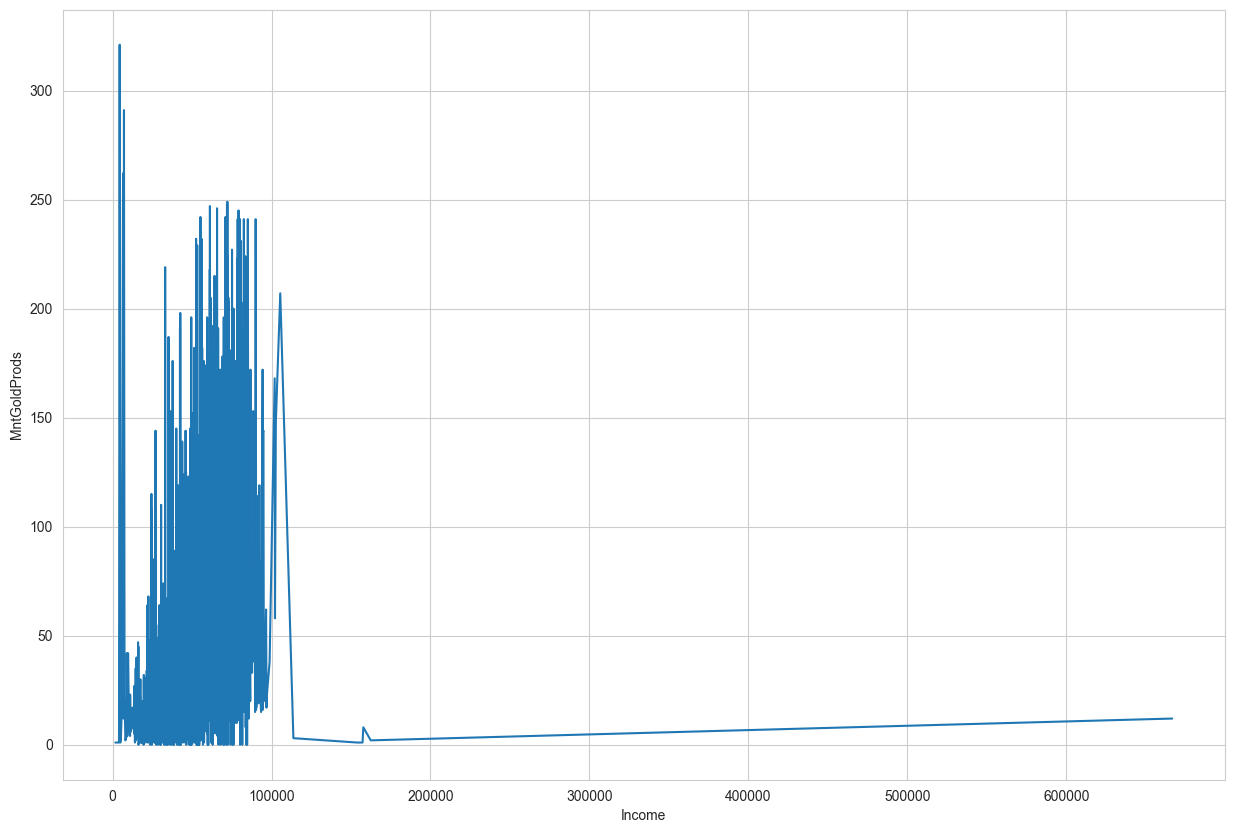

In [105]:
# График 5

plt.figure(figsize=(15, 10))
lp = sns.lineplot(data=df, x="Income", y="MntGoldProds")

##### Scatterplot график для показа, как зависят траты на золото от дохода 

<AxesSubplot: xlabel='Income', ylabel='MntGoldProds'>

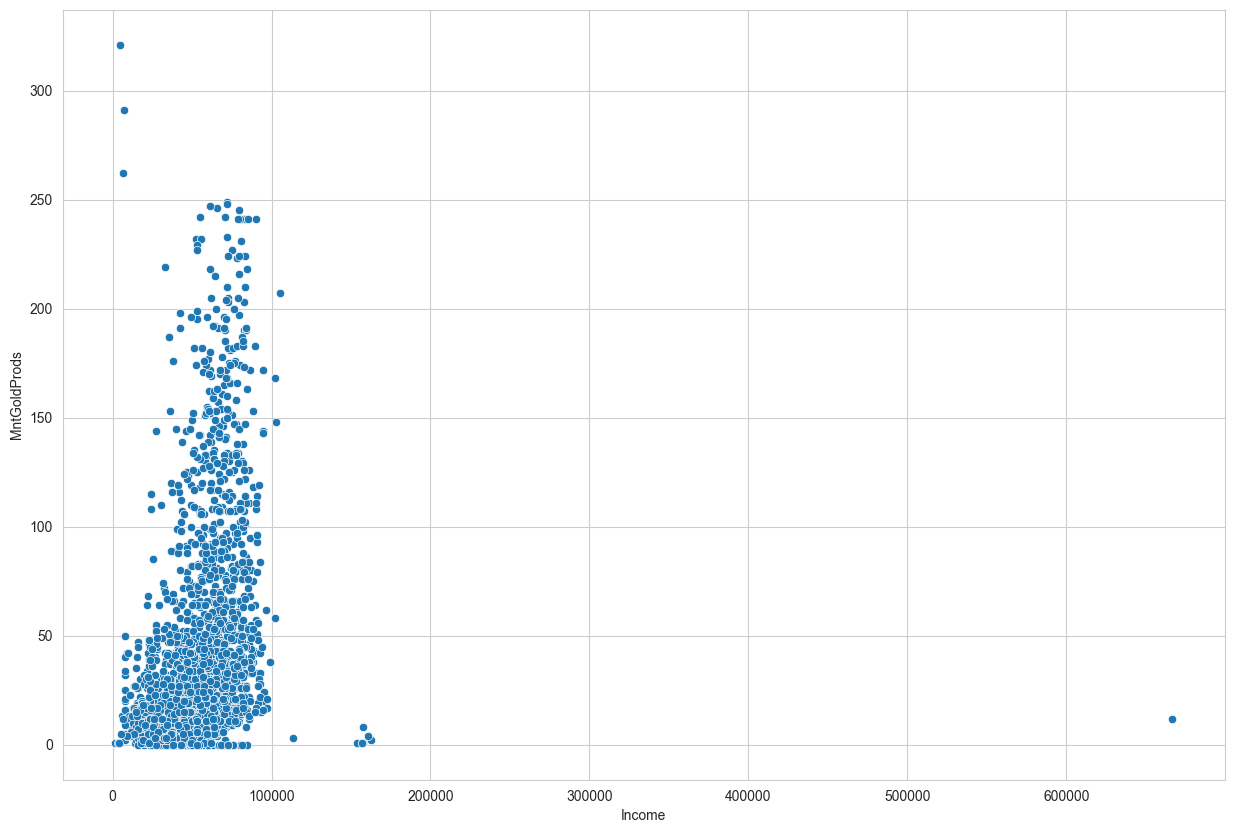

In [106]:
# График 6

plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, y="MntGoldProds", x="Income")

### Вопрос 3
На основании графиков 5 и 6, можно сказать, что большинство людей тратятся на золото, но при этом люди с высоким доходом покупают его в больших размерах.



_______________________________________________________________________________________________________________________________________________

##### Lineplot график для показа зависимости количества покупок через сайт от возраста

<AxesSubplot: xlabel='Year_Birth', ylabel='NumWebPurchases'>

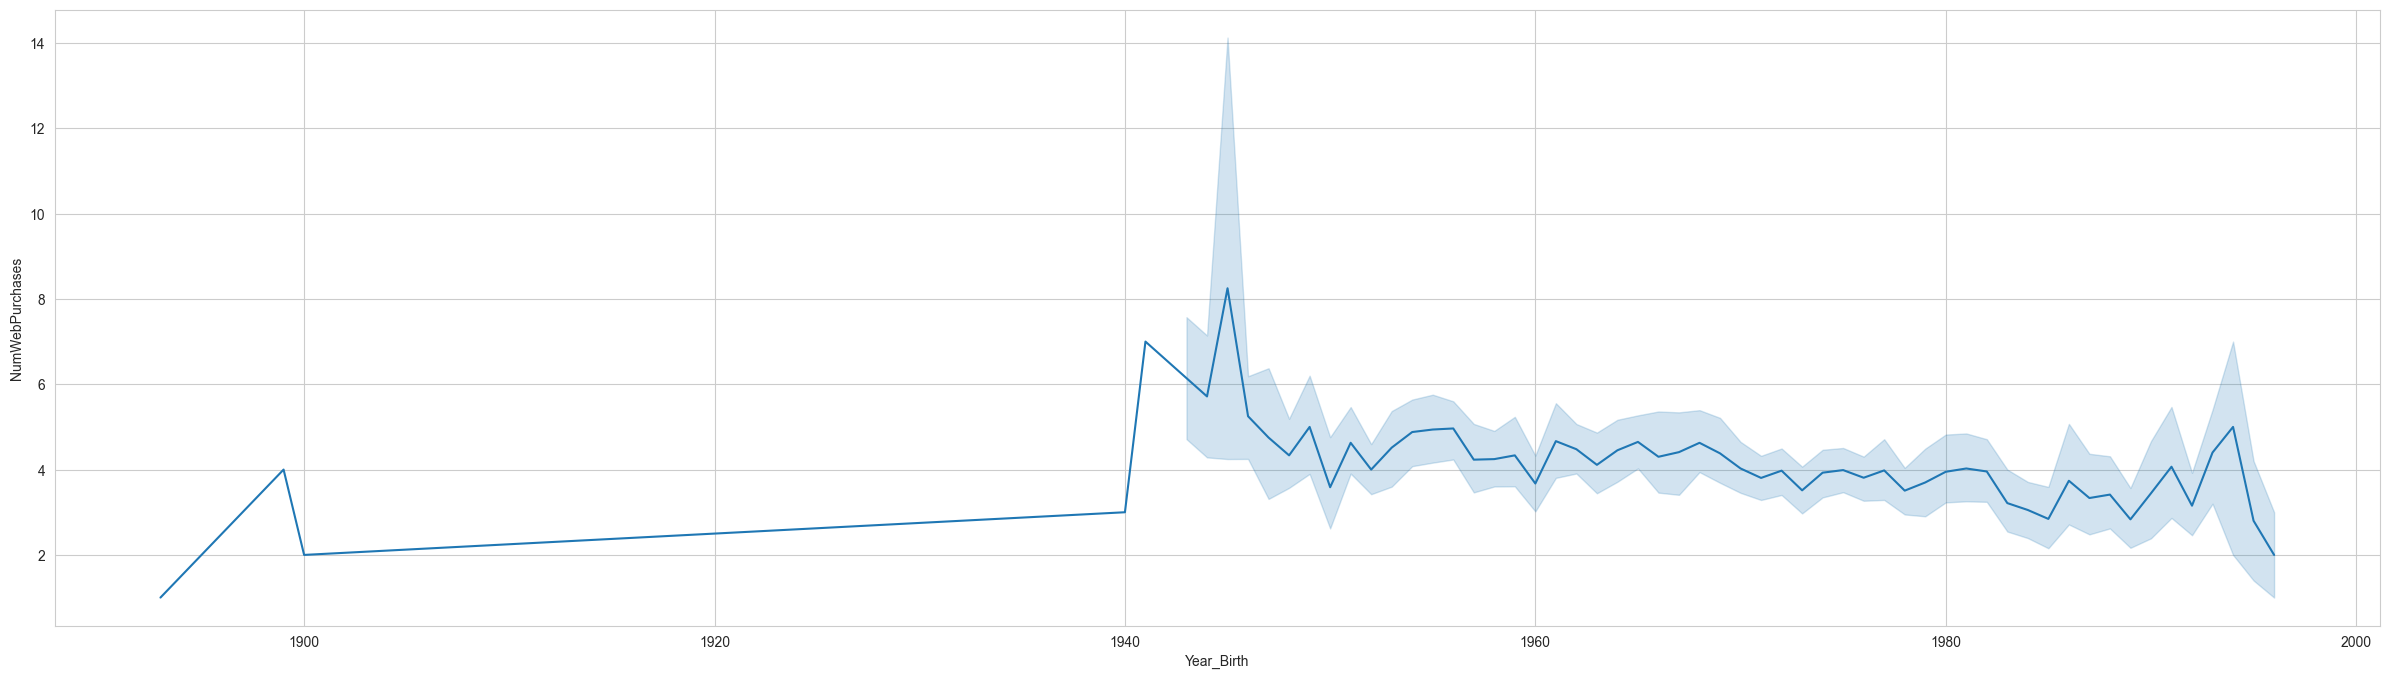

In [107]:
# График 7

plt.figure(figsize=(30,8))
sns.lineplot(data=df, x="Year_Birth", y="NumWebPurchases")

##### Lineplot график для показа зависимости количества покупок в магазине от возраста

<AxesSubplot: xlabel='Year_Birth', ylabel='NumStorePurchases'>

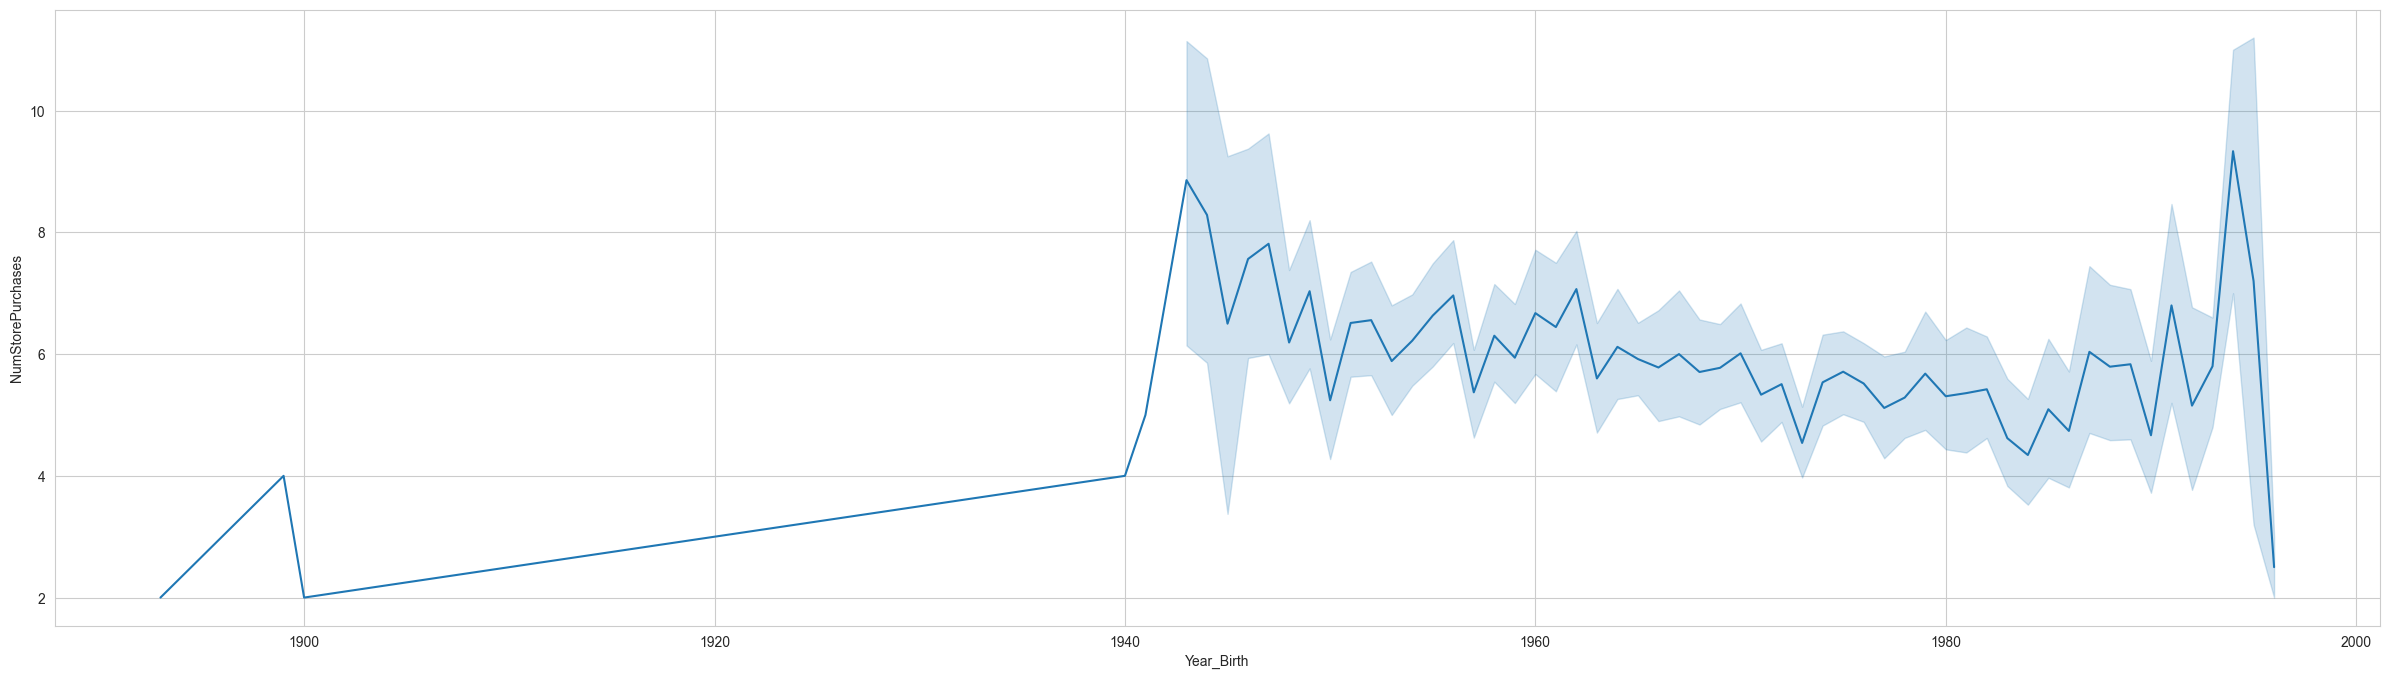

In [108]:
# График 8

plt.figure(figsize=(30,8))
sns.lineplot(data=df, x="Year_Birth", y="NumStorePurchases")

### Вопрос 4
На основании графиков 7 и 8 можно сделать вывод, что с у более взрослых людей из выборки больше покупок, как через сайт, так и в магазине напрямую

__________________________________________________________________________________________________________________________

### Матрица корреляции 

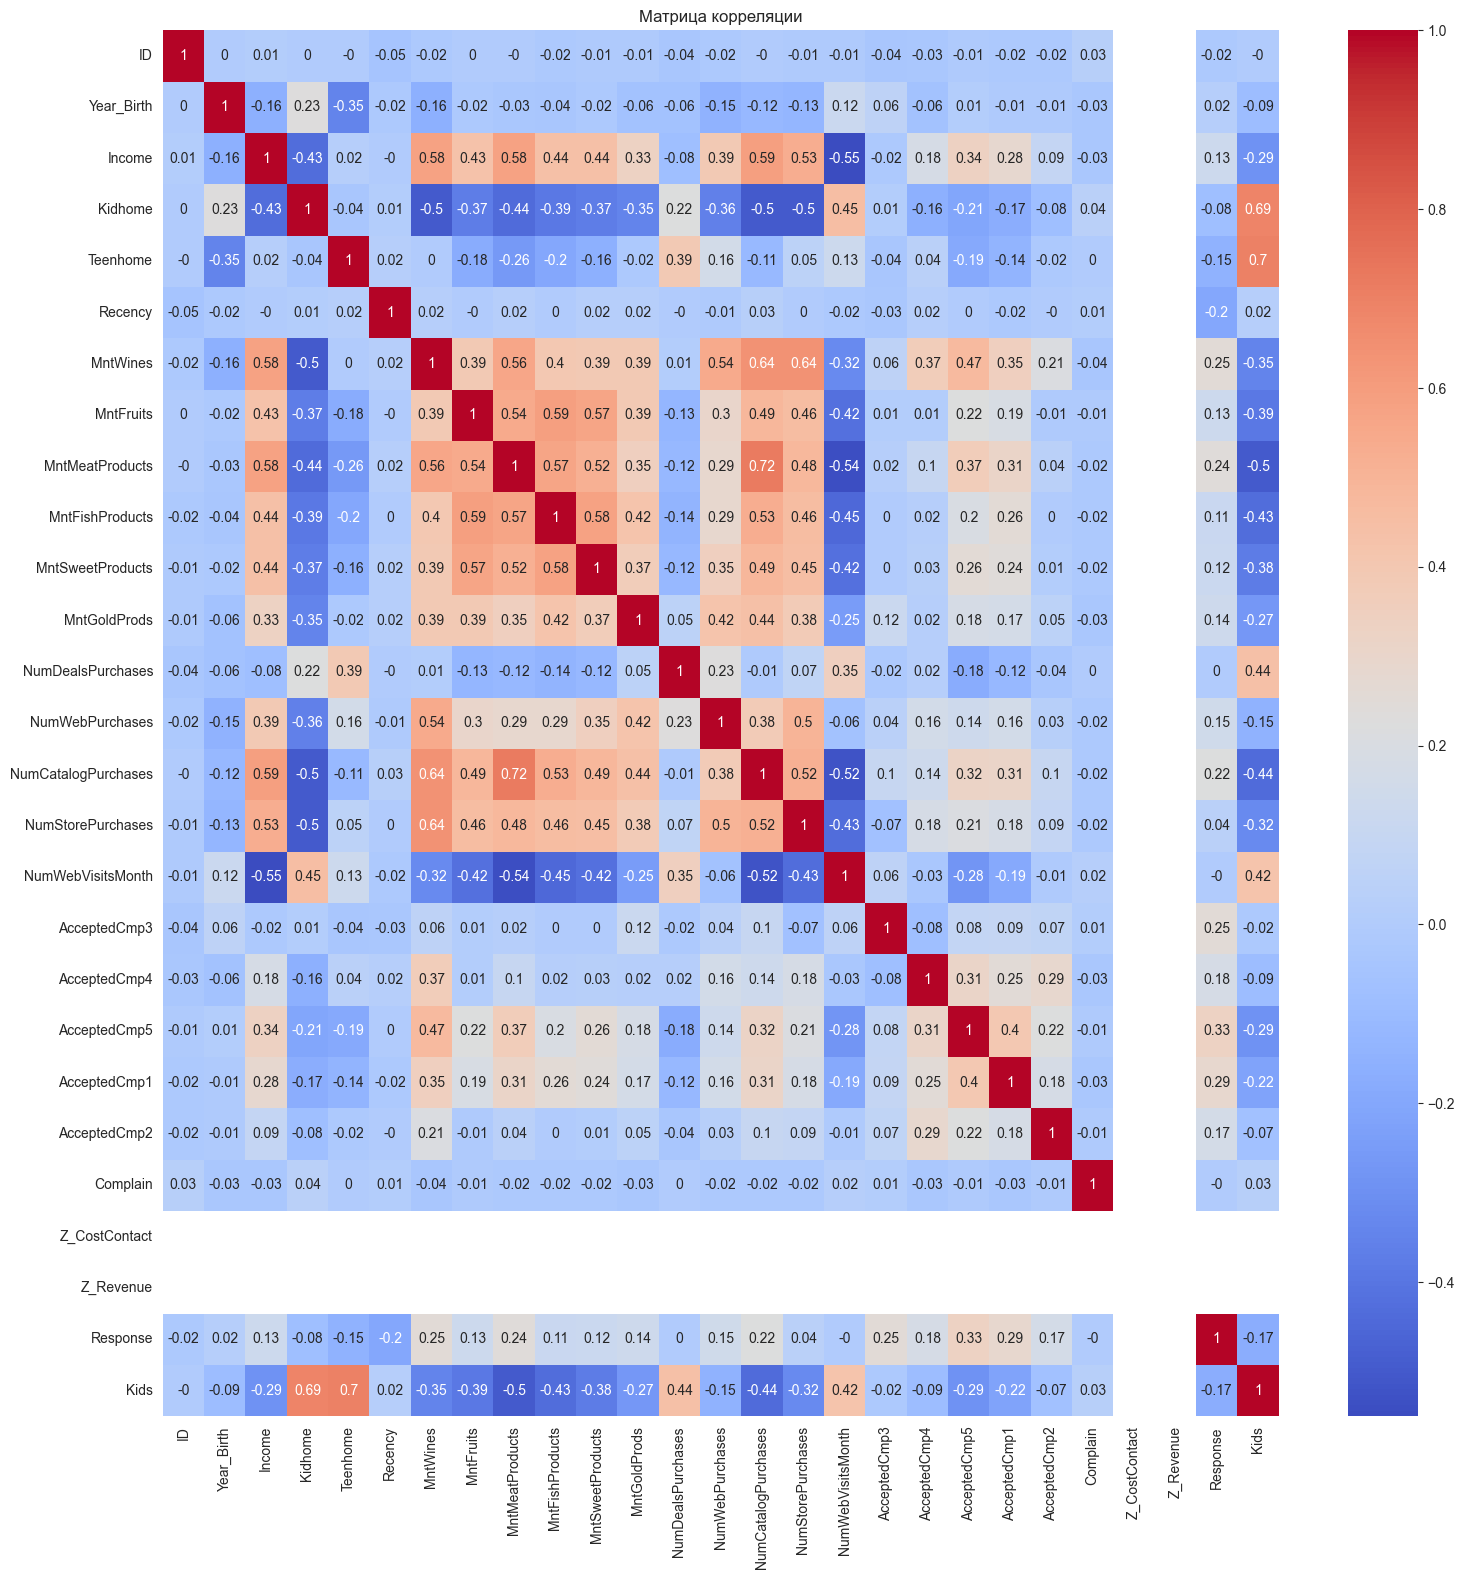

In [109]:
correlation_matrix = df.corr(numeric_only=True).round(2)
plt.figure(figsize=(18,18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

#### Вывод

1) Видно, что доход зависит от покупок и трат на продукты (Mnt). Чем выше доход, тем больше покупок
2) Присутсвует зависимость между количеством покупок через каталог и товаров. Следовательно каталог магазина повышает покупки товара